In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. MNIST

### 1.1 IID

In [62]:
result_dir = "./save/mnist/"

dataset = 'mnist'
model = 'cnn'
epochs = 50
frac = 0.1
iid = True
lr = 0.01
momentum = 0.5

### 1.2 Non-IID

In [31]:
result_dir = "./save/mnist/"

dataset = 'mnist'
model = 'cnn'
epochs = 50
frac = 0.1
iid = False
lr = 0.01
momentum = 0.5
noise_type = 'symmetric'

# 2. CIFAR 10

## 2.1 SYM

### 2.1.1 IID

In [27]:
result_dir = "./save/cifar10/"

dataset = 'cifar'
model = 'cnn'
epochs = 100
frac = 0.1
iid = True
lr = 0.01
momentum = 0.5

No LNL Best
47.81000137329102	45.79999923706055	43.959999084472656	41.900001525878906	39.27999877929688	34.709999084472656	
No LNL Last 10
47.18600006103516	42.01499977111816	36.25700035095215	31.8439998626709	26.148000144958495	20.76599998474121	
JO Best
46.53	44.83	42.87	40.3	36.84	32.3	
JO Last 10
42.37	41.57	40.09	37.81	35.03	30.92	

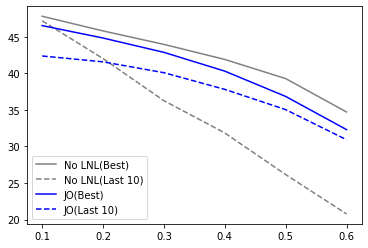

In [30]:
# No Noise

x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# No LNL

no_lnl_best = []
no_lnl_last10 = []

for noise_rate in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    sym_f = 'fedLNL_{}_{}_{}_C[{}]_IID[{}]_LR[{}]_MMT[{}]_NT[{}]_NR[{}].csv'.format(dataset, 
                                                                                  model, 
                                                                                  epochs, 
                                                                                  frac, 
                                                                                  iid,
                                                                                  lr,
                                                                                  momentum,
                                                                                  noise_type,
                                                                                  noise_rate)
    
    sym_noise_acc = pd.read_csv(result_dir + sym_f)['test_acc']
    no_lnl_best.append(max(sym_noise_acc))
    no_lnl_last10.append(sym_noise_acc[90:].mean())

print("No LNL Best")
for acc in no_lnl_best:
    print(round(acc, 2), end="\t")
print()
print("No LNL Last 10")
for acc in no_lnl_last10:
    print(round(acc, 2), end="\t")
    
plt.plot(x, no_lnl_best, label='No LNL(Best)'.format(noise_rate), color='gray')
plt.plot(x, no_lnl_last10, "--", label='No LNL(Last 10)'.format(noise_rate), color='gray')

   
# Joint Optimization
jo_best = []
jo_last10 = []

for noise_rate in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    sym_f = 'fedLNL_JointOpt_{}_{}_{}_C[{}]_IID[{}]_LR[{}]_MMT[{}]_NT[{}]_NR[{}]_BEGIN[{}]_ALPHA[{}]_BETA[{}].csv'.format(dataset, 
                                                                                                                          model, 
                                                                                                                          epochs, 
                                                                                                                          frac, 
                                                                                                                          iid,
                                                                                                                          lr,
                                                                                                                          momentum,
                                                                                                                          noise_type,
                                                                                                                          noise_rate, 
                                                                                                                          15,
                                                                                                                          1.2,
                                                                                                                          0.8)
    sym_noise_acc = pd.read_csv(result_dir + sym_f)['test_acc']
    jo_best.append(max(sym_noise_acc))
    jo_last10.append(sym_noise_acc[90:].mean())
    
print()
print("JO Best")
for acc in jo_best:
    print(round(acc, 2), end="\t")
print()
print("JO Last 10")
for acc in jo_last10:
    print(round(acc, 2), end="\t")

plt.plot(x, jo_best, label='JO(Best)'.format(noise_rate), color="blue")
plt.plot(x, jo_last10, "--", label='JO(Last 10)'.format(noise_rate), color="blue")



plt.legend()
plt.show()
plt.close()



### 2.1.2 Non-IID

In [31]:
result_dir = "./save/cifar10/"

dataset = 'cifar'
model = 'cnn'
epochs = 100
frac = 0.1
iid = False
lr = 0.01
momentum = 0.5

No LNL Best
36.86	35.7	31.68	30.35	27.74	24.38	
No LNL Last 10
29.15	25.0	19.91	18.58	16.06	13.77	
JO Best
40.32	38.18	36.07	31.6	29.53	25.71	
JO Last 10
33.67	32.85	31.64	27.75	26.32	24.02	

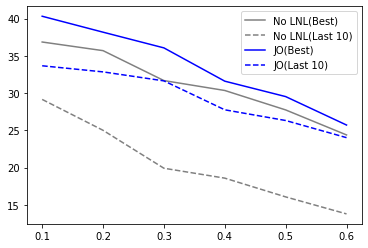

In [32]:
# No Noise

x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# No LNL

no_lnl_best = []
no_lnl_last10 = []

for noise_rate in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    sym_f = 'fedLNL_{}_{}_{}_C[{}]_IID[{}]_LR[{}]_MMT[{}]_NT[{}]_NR[{}].csv'.format(dataset, 
                                                                                  model, 
                                                                                  epochs, 
                                                                                  frac, 
                                                                                  iid,
                                                                                  lr,
                                                                                  momentum,
                                                                                  noise_type,
                                                                                  noise_rate)
    
    sym_noise_acc = pd.read_csv(result_dir + sym_f)['test_acc']
    no_lnl_best.append(max(sym_noise_acc))
    no_lnl_last10.append(sym_noise_acc[90:].mean())

print("No LNL Best")
for acc in no_lnl_best:
    print(round(acc, 2), end="\t")
print()
print("No LNL Last 10")
for acc in no_lnl_last10:
    print(round(acc, 2), end="\t")
    
plt.plot(x, no_lnl_best, label='No LNL(Best)'.format(noise_rate), color='gray')
plt.plot(x, no_lnl_last10, "--", label='No LNL(Last 10)'.format(noise_rate), color='gray')

   
# Joint Optimization
jo_best = []
jo_last10 = []

for noise_rate in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    sym_f = 'fedLNL_JointOpt_{}_{}_{}_C[{}]_IID[{}]_LR[{}]_MMT[{}]_NT[{}]_NR[{}]_BEGIN[{}]_ALPHA[{}]_BETA[{}].csv'.format(dataset, 
                                                                                                                          model, 
                                                                                                                          epochs, 
                                                                                                                          frac, 
                                                                                                                          iid,
                                                                                                                          lr,
                                                                                                                          momentum,
                                                                                                                          noise_type,
                                                                                                                          noise_rate, 
                                                                                                                          15,
                                                                                                                          1.2,
                                                                                                                          0.8)
    sym_noise_acc = pd.read_csv(result_dir + sym_f)['test_acc']
    jo_best.append(max(sym_noise_acc))
    jo_last10.append(sym_noise_acc[90:].mean())
    
print()
print("JO Best")
for acc in jo_best:
    print(round(acc, 2), end="\t")
print()
print("JO Last 10")
for acc in jo_last10:
    print(round(acc, 2), end="\t")

plt.plot(x, jo_best, label='JO(Best)'.format(noise_rate), color="blue")
plt.plot(x, jo_last10, "--", label='JO(Last 10)'.format(noise_rate), color="blue")



plt.legend()
plt.show()
plt.close()



## 2.2 Pairflip

### 2.2.1 IID

In [34]:
result_dir = "./save/cifar10/"

dataset = 'cifar'
model = 'cnn'
epochs = 100
frac = 0.1
iid = True
lr = 0.01
momentum = 0.5
noise_type = "pairflip"

No LNL Best
46.16	43.37	39.54	33.78	
No LNL Last 10
45.68	41.13	35.6	30.73	
JO Best
44.96	42.68	40.77	36.75	
JO Last 10
41.76	39.85	38.49	35.8	

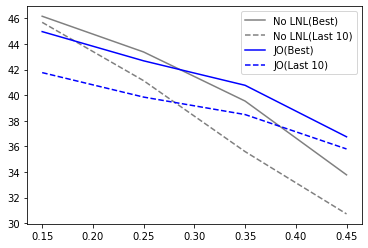

In [36]:
# No Noise

x = [0.15, 0.25, 0.35, 0.45]

# No LNL

no_lnl_best = []
no_lnl_last10 = []

for noise_rate in x:
    f = 'fedLNL_{}_{}_{}_C[{}]_IID[{}]_LR[{}]_MMT[{}]_NT[{}]_NR[{}].csv'.format(dataset, 
                                                                                  model, 
                                                                                  epochs, 
                                                                                  frac, 
                                                                                  iid,
                                                                                  lr,
                                                                                  momentum,
                                                                                  noise_type,
                                                                                  noise_rate)
    
    noise_acc = pd.read_csv(result_dir + f)['test_acc']
    no_lnl_best.append(max(noise_acc))
    no_lnl_last10.append(noise_acc[90:].mean())

print("No LNL Best")
for acc in no_lnl_best:
    print(round(acc, 2), end="\t")
print()
print("No LNL Last 10")
for acc in no_lnl_last10:
    print(round(acc, 2), end="\t")
    
plt.plot(x, no_lnl_best, label='No LNL(Best)'.format(noise_rate), color='gray')
plt.plot(x, no_lnl_last10, "--", label='No LNL(Last 10)'.format(noise_rate), color='gray')

   
# Joint Optimization
jo_best = []
jo_last10 = []

for noise_rate in x:
    sym_f = 'fedLNL_JointOpt_{}_{}_{}_C[{}]_IID[{}]_LR[{}]_MMT[{}]_NT[{}]_NR[{}]_BEGIN[{}]_ALPHA[{}]_BETA[{}].csv'.format(dataset, 
                                                                                                                          model, 
                                                                                                                          epochs, 
                                                                                                                          frac, 
                                                                                                                          iid,
                                                                                                                          lr,
                                                                                                                          momentum,
                                                                                                                          noise_type,
                                                                                                                          noise_rate, 
                                                                                                                          15,
                                                                                                                          1.2,
                                                                                                                          0.8)
    sym_noise_acc = pd.read_csv(result_dir + sym_f)['test_acc']
    jo_best.append(max(sym_noise_acc))
    jo_last10.append(sym_noise_acc[90:].mean())
    
print()
print("JO Best")
for acc in jo_best:
    print(round(acc, 2), end="\t")
print()
print("JO Last 10")
for acc in jo_last10:
    print(round(acc, 2), end="\t")

plt.plot(x, jo_best, label='JO(Best)'.format(noise_rate), color="blue")
plt.plot(x, jo_last10, "--", label='JO(Last 10)'.format(noise_rate), color="blue")



plt.legend()
plt.show()
plt.close()



### 2.2.2 Non-IID

In [37]:
result_dir = "./save/cifar10/"

dataset = 'cifar'
model = 'cnn'
epochs = 100
frac = 0.1
iid = False
lr = 0.01
momentum = 0.5
noise_type = "pairflip"

No LNL Best
34.08	29.88	27.46	25.01	
No LNL Last 10
29.71	25.72	22.5	20.66	
JO Best
35.63	33.66	31.08	26.78	
JO Last 10
30.47	28.52	27.23	22.7	

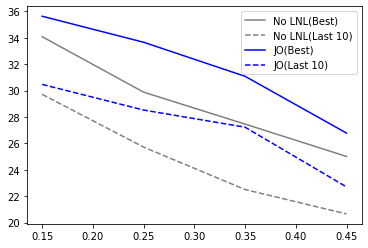

In [38]:
# No Noise

x = [0.15, 0.25, 0.35, 0.45]

# No LNL

no_lnl_best = []
no_lnl_last10 = []

for noise_rate in x:
    f = 'fedLNL_{}_{}_{}_C[{}]_IID[{}]_LR[{}]_MMT[{}]_NT[{}]_NR[{}].csv'.format(dataset, 
                                                                                  model, 
                                                                                  epochs, 
                                                                                  frac, 
                                                                                  iid,
                                                                                  lr,
                                                                                  momentum,
                                                                                  noise_type,
                                                                                  noise_rate)
    
    noise_acc = pd.read_csv(result_dir + f)['test_acc']
    no_lnl_best.append(max(noise_acc))
    no_lnl_last10.append(noise_acc[90:].mean())

print("No LNL Best")
for acc in no_lnl_best:
    print(round(acc, 2), end="\t")
print()
print("No LNL Last 10")
for acc in no_lnl_last10:
    print(round(acc, 2), end="\t")
    
plt.plot(x, no_lnl_best, label='No LNL(Best)'.format(noise_rate), color='gray')
plt.plot(x, no_lnl_last10, "--", label='No LNL(Last 10)'.format(noise_rate), color='gray')

   
# Joint Optimization
jo_best = []
jo_last10 = []

for noise_rate in x:
    sym_f = 'fedLNL_JointOpt_{}_{}_{}_C[{}]_IID[{}]_LR[{}]_MMT[{}]_NT[{}]_NR[{}]_BEGIN[{}]_ALPHA[{}]_BETA[{}].csv'.format(dataset, 
                                                                                                                          model, 
                                                                                                                          epochs, 
                                                                                                                          frac, 
                                                                                                                          iid,
                                                                                                                          lr,
                                                                                                                          momentum,
                                                                                                                          noise_type,
                                                                                                                          noise_rate, 
                                                                                                                          15,
                                                                                                                          1.2,
                                                                                                                          0.8)
    sym_noise_acc = pd.read_csv(result_dir + sym_f)['test_acc']
    jo_best.append(max(sym_noise_acc))
    jo_last10.append(sym_noise_acc[90:].mean())
    
print()
print("JO Best")
for acc in jo_best:
    print(round(acc, 2), end="\t")
print()
print("JO Last 10")
for acc in jo_last10:
    print(round(acc, 2), end="\t")

plt.plot(x, jo_best, label='JO(Best)'.format(noise_rate), color="blue")
plt.plot(x, jo_last10, "--", label='JO(Last 10)'.format(noise_rate), color="blue")



plt.legend()
plt.show()
plt.close()

